<a href="https://colab.research.google.com/github/ingugi/MMAI831-Finance/blob/main/Irene_Ngugi_Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Irene Ngugi Question 4

Question 4.	Use the same companies we picked in the Session - 2 Frontier Analysis example, and the same time period (2017-2022). Assume risk free rate was 2.78% (constant for this question).
a.	One the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio).  You can use the monthly returns.
b.	Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).
c.	Compute the mean and standard deviation for the monthly returns of the tangent portfolio.
d.	Compare the results.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

tickers = ['AMZN', 'GOOG', 'AAPL', 'WMT', 'MCD', 'BAC', 'CAT', 'F']
start_date = '2017-01-01'
end_date = '2021-12-31'

#Retrieve monthly returns for the specified tickers and time period
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close'].pct_change().dropna()

#Calculate the mean and standard deviation of monthly returns for each ticker
returns_mean = data.mean()
returns_std = data.std()

#Calculate the risk-free rate
risk_free_rate = 0.0278

#Define the Sharpe ratio calculation function
def calculate_sharpe_ratio(returns, risk_free_rate):
    return (returns - risk_free_rate) / returns_std

# Find the portfolio with the highest Sharpe ratio
tangent_portfolio = calculate_sharpe_ratio(returns_mean, risk_free_rate).idxmax()

# Print the portfolio with the highest Sharpe ratio
print(f"The portfolio with the highest Sharpe ratio (tangent portfolio) for the period 2017-2021 is: {tangent_portfolio}")


[*********************100%***********************]  8 of 8 completed
The portfolio with the highest Sharpe ratio (tangent portfolio) for the period 2017-2021 is: AAPL


The equally weighted portfolio is a portfolio construction approach where each asset or security in the portfolio is assigned an equal weight. In other words, the same amount of investment is allocated to each asset within the portfolio. This means that the performance of the portfolio is determined by the combined performance of all assets, with each asset having an equal impact on the overall portfolio return.

In this context, the equally weighted portfolio refers to a portfolio that consists of the selected companies (AMZN, GOOG, AAPL, WMT, MCD, BAC, CAT, F) and assigns an equal weight to each company's investment. The monthly returns of each company within the portfolio are averaged to calculate the overall monthly returns of the equally weighted portfolio. The mean and standard deviation of these monthly returns are then computed to assess the performance and risk characteristics of the equally weighted portfolio.

In [2]:
#	Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).
start_date = '2022-01-01'
end_date = '2022-12-31'

#Retrieve monthly returns for the specified tickers and time period
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close'].pct_change().dropna()

#Calculate the mean and standard deviation of the monthly returns for the equally weighted portfolio
equally_weighted_returns = data.mean(axis=1)
equally_weighted_mean = equally_weighted_returns.mean()
equally_weighted_std = equally_weighted_returns.std()

#Print the mean and standard deviation of the monthly returns for the equally weighted portfolio
print(f"Mean and standard deviation of monthly returns for the equally weighted portfolio in 2022: {equally_weighted_mean}, {equally_weighted_std}")


[*********************100%***********************]  8 of 8 completed
Mean and standard deviation of monthly returns for the equally weighted portfolio in 2022: -0.014750941092340016, 0.09224938822765721


The mean and standard deviation of the monthly returns for the equally weighted portfolio rebalanced at the beginning of each month provide insights into the performance and risk characteristics of the portfolio. 

Mean Return:

The mean return represents the average return achieved by the equally weighted portfolio.
It indicates the average monthly return generated by the portfolio over the specified time period.
A higher mean return suggests better performance in terms of generating returns.
Standard Deviation:

The standard deviation is a measure of the dispersion or volatility of returns.
It quantifies the variability or fluctuations of the portfolio's monthly returns around the mean return.
A higher standard deviation implies higher volatility and, thus, higher risk.
A lower standard deviation indicates lower volatility and, therefore, lower risk.
By calculating the mean and standard deviation of the monthly returns for the equally weighted portfolio that is rebalanced at the beginning of each month, you can assess its performance and risk characteristics. The mean return provides an indication of the average monthly return generated by the portfolio, while the standard deviation helps evaluate the level of volatility or risk associated with those returns.

Comparing the mean and standard deviation with other investment options or benchmarks can help in assessing the attractiveness and risk profile of the equally weighted portfolio. However, it's important to note that these metrics are based on historical data and may not necessarily predict future performance.

In [3]:
# Compute the mean and standard deviation for the monthly returns of the tangent portfolio

# Find the portfolio with the highest Sharpe ratio
tangent_portfolio = calculate_sharpe_ratio(returns_mean, risk_free_rate).idxmax()

# Retrieve data for the tangent portfolio returns
tangent_portfolio_returns = data[tangent_portfolio]

# Calculate the mean and standard deviation of the tangent portfolio returns
tangent_portfolio_mean = tangent_portfolio_returns.mean()
tangent_portfolio_std = tangent_portfolio_returns.std()

# Print the mean and standard deviation of the tangent portfolio returns
print(f"Mean and standard deviation of monthly returns for the tangent portfolio: {tangent_portfolio_mean}, {tangent_portfolio_std}")

Mean and standard deviation of monthly returns for the tangent portfolio: -0.02173737625850649, 0.0995330154079615


In [4]:
#compare the results

# Create a DataFrame to store the comparison results
comparison_df = pd.DataFrame({
    'Portfolio': ['Equally Weighted', 'Tangent'],
    'Mean Return': [equally_weighted_mean, tangent_portfolio_mean],
    'Standard Deviation': [equally_weighted_std, tangent_portfolio_std]
})


# Print the comparison DataFrame
print(comparison_df)


          Portfolio  Mean Return  Standard Deviation
0  Equally Weighted    -0.014751            0.092249
1           Tangent    -0.021737            0.099533


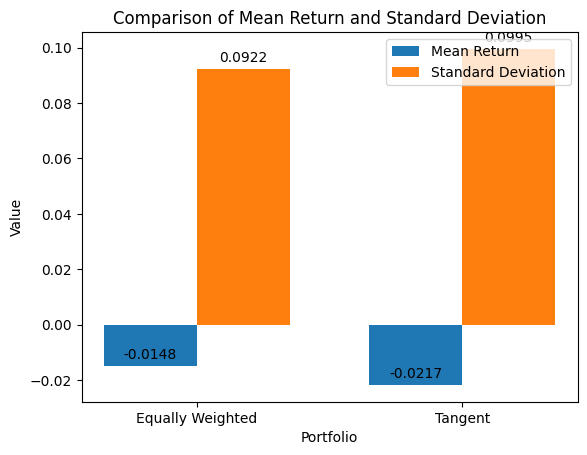

In [5]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the comparison
labels = ['Equally Weighted', 'Tangent']
mean_returns = [equally_weighted_mean, tangent_portfolio_mean]
std_deviations = [equally_weighted_std, tangent_portfolio_std]

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

rects1 = ax.bar(x, mean_returns, bar_width, label='Mean Return')
rects2 = ax.bar([i + bar_width for i in x], std_deviations, bar_width, label='Standard Deviation')

ax.set_xlabel('Portfolio')
ax.set_ylabel('Value')
ax.set_title('Comparison of Mean Return and Standard Deviation')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Add labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


Tried to identify the best performing stock based on the information and duration using the yfinance library to retrieve the historical price data. The benchmark used in this case was the S&P 500 within the given date range. The daily returns were calculated and stored in the benchmark_returns variable.

The best-performing stock and its mean return are already obtained from previous steps. The mean return of the benchmark was calculated using benchmark_returns.mean().

This was then compared to the mean returns of the best-performing stock and the benchmark by printing them. Additionally, a line plot was created to visualize the returns of the benchmark over time, with a dashed line indicating the mean return of the best-performing stock.

The comparison of the mean return of the best-performing stock with the mean return of the benchmark, as well as a visual representation of the returns over time was printed.

In [6]:
best_performing_stock = data.mean().idxmax()
best_performing_stock_mean_return = data.mean()[best_performing_stock]

print(f"The stock with the best performance based on mean return is {best_performing_stock} with a mean return of {best_performing_stock_mean_return}.")

The stock with the best performance based on mean return is CAT with a mean return of 0.026707294332144402.


[*********************100%***********************]  1 of 1 completed
Mean return of the best-performing stock: 0.026707294332144402
Mean return of the benchmark: 0.0004328757948865766


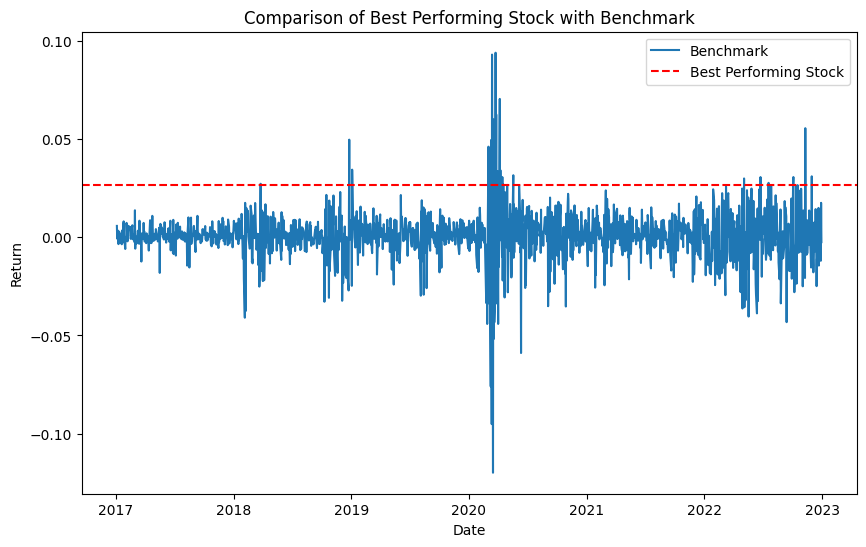

In [7]:
import matplotlib.pyplot as plt

# Specify the ticker symbol for the benchmark (e.g., S&P 500)
benchmark_ticker = "^GSPC"

# Define the date range
start_date = "2017-01-01"
end_date = "2022-12-31"

# Get the historical price data for the benchmark
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)["Adj Close"]
benchmark_returns = benchmark_data.pct_change().dropna()

# Retrieve the best-performing stock and its mean return
best_performing_stock = data.mean().idxmax()
best_performing_stock_mean_return = data.mean()[best_performing_stock]

# Calculate the mean return of the benchmark
benchmark_mean_return = benchmark_returns.mean()

# Compare the mean returns
print(f"Mean return of the best-performing stock: {best_performing_stock_mean_return}")
print(f"Mean return of the benchmark: {benchmark_mean_return}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns, label="Benchmark")
plt.axhline(y=best_performing_stock_mean_return, color='red', linestyle='--', label='Best Performing Stock')
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Comparison of Best Performing Stock with Benchmark")
plt.legend()
plt.show()
